In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

## Interpolation
#### Résolution du problème de données manquantes dont la recolte de données se fait par deux capteurs mais de fréquence d'acquisition différente, un  collecte les données toutes les sécondes et l'autre après 3 secondes

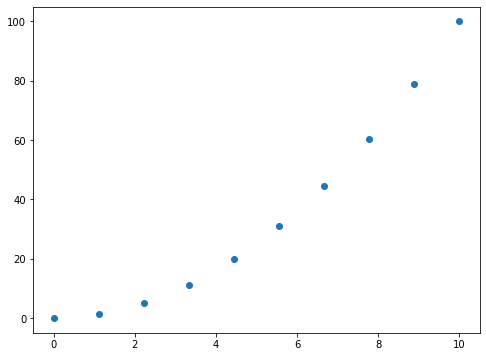

In [2]:
# x matrice contenant 10 élements entre 0 et 10
x = np.linspace(0, 10, 10)
# y est le carré de x
y = x**2

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.show()

In [3]:
# Interpoler : placer plus de points entre nos différents points bleus.

# interp1d va générer une fonction d'interpolation
from scipy.interpolate import interp1d

In [4]:
# Donner les données qui doivent être interpolées et le type d'interpolation que l'on veut
# Par défaut, le type d'interpolation est linéaire donc pas besoin de préciser une interpolatin linéaire
f = interp1d(x, y)

# Nouvelles données
new_data = np.linspace(0, 10, 20)
# Assigner les nouvelles données à la fonction d'interpolation
result = f(new_data)

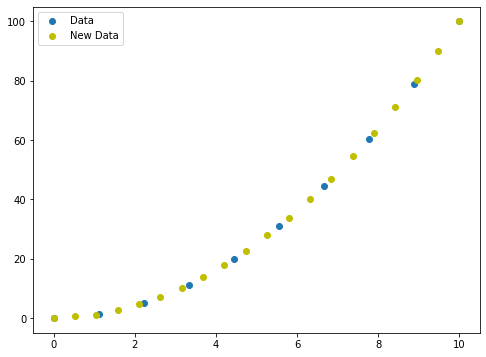

In [5]:
# Remplissage ou Interpolation proprement dite
plt.figure(figsize=(8, 6))
# Anciennes données
plt.scatter(x, y, label="Data")
# Insertion de nouvelles données interpolées
plt.scatter(new_data, result, c="y", label="New Data")
plt.legend()
plt.show()

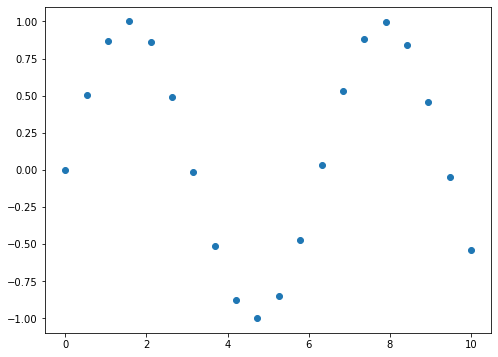

In [6]:
# x matrice contenant 10 élements entre 0 et 10
x = np.linspace(0, 10, 20)
# y est le carré de x
y = np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.show()

## Avec la figure ci-dessus, il faut completement changer le type d'interpolation

In [7]:
# Donner les données qui doivent être interpolées et le type d'interpolation que l'on veut
f = interp1d(x, y, kind="cubic")

# Nouvelles données
new_data = np.linspace(0, 10, 50)
# Assigner les nouvelles données à la fonction d'interpolation
result = f(new_data)

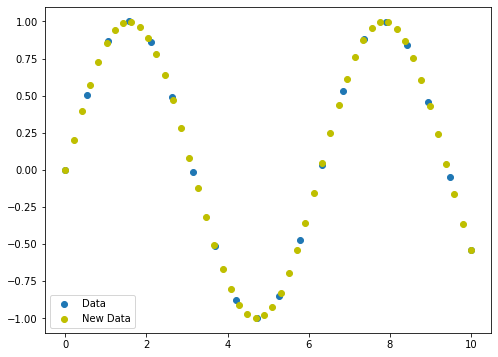

In [8]:
# Remplissage ou Interpolation proprement dite
plt.figure(figsize=(8, 6))
# Anciennes données
plt.scatter(x, y, label="Data")
# Insertion de nouvelles données interpolées
plt.scatter(new_data, result, c="y", label="New Data")
plt.legend()
plt.show()

# Optimisation
#### L'optimisation fait souvent réference aux problèmes de minimisation

In [9]:
# Une matrice de 100 élements entre 0 et 2
x = np.linspace(0, 2, 100)
# Un polynome de degré 3
y = 1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20 

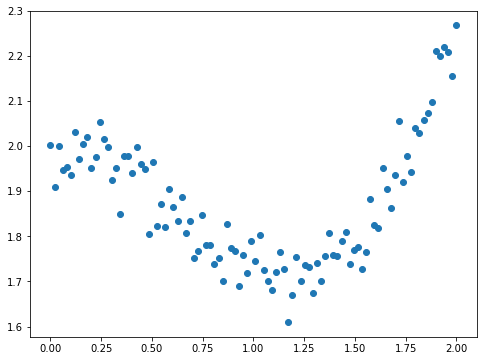

In [10]:
# Création d'une figure
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.show()

### Le but est dévolpper un modèle stat qui entre parfaitement dans le nuage de points

##  Fonction curve_fit()
#### Cette technique utilise la méthode des moindre carrés pour trouver les meilleurs paramètres d'un modèle f

In [11]:
# Création du modèle sur lequel se basera curve_fit
def f(x, a, b, c, d):
    
    # Une fonction de degré 3
    return a * x**3 + b * x**2 + c * x + d

In [12]:
# Importer le modèle d'optimisation
from scipy import optimize

In [13]:
# Donner ce modèle(cette foncion) à la fonction curve_fit ainsi que les données de notre dataset
# Cette fonction nous renvoie deux matrices l'une des paramètres a, b, c et d
# et l'autre, une matrice de covariance de ces paramètres
params, cov_param = optimize.curve_fit(f, x, y)

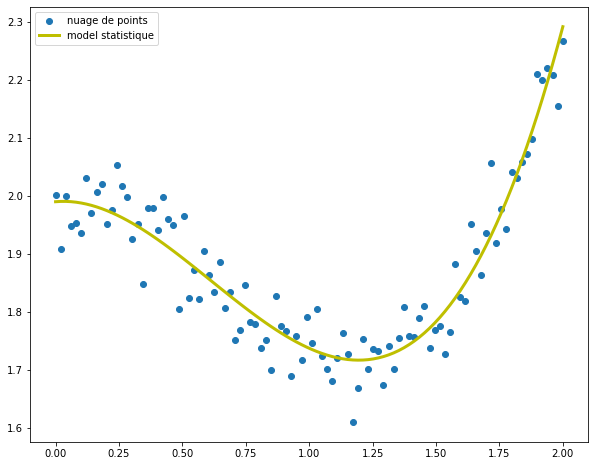

In [14]:
# Visualisation
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label="nuage de points")
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), label="model statistique", c="y", lw=3)
plt.legend()
plt.show()

## Minimisation
### optimize.minimize()
#### Cette fonction permet de minimiser toutes les fonctions mathématiques

In [15]:
# Définir un modèle
def f(x):
    
    return x**2 + 15*np.sin(x)

In [16]:
# Une matrice de 100 éléments allant de -10 à 10
x = np.linspace(-10, 10, 100)
#sin_x = np.sin(x)
#sin_x*15

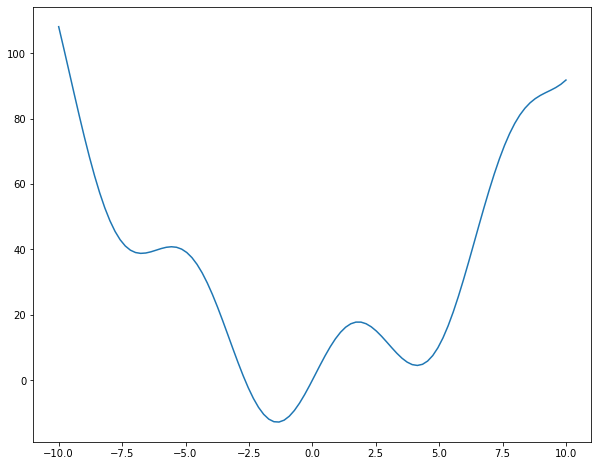

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(x, f(x))
plt.show()

## TROUVER LE MINIMUM SUR UN GRAPHIQUE EN 1D

### Ici le but est de trouver le minimum de la fonction ci-dessus, il faut rappeller que nous pouvons avoir un ou +plusieurs minimun localaux mais ici le but est d'atteindre le minimun global de la fonction reprsentée ci-dessus

In [18]:
# Appliquer la fonction minimize() ayant pour point de départ avant le tout 1er local minimum
optimize.minimize(f, x0=-9)

      fun: 38.8112061759586
 hess_inv: array([[0.11622358]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.73789934])

In [19]:
## D'après les infos que nous retourne cette fonction, la valeur du minimum est x: array([-6.73789934])
# Mais on peut clairement voir que cela represente le minimum local, or ce qui nous intéresse c'est le
# minimum global donc, il faut soit changer l'algo ou le point de départ afin d'arriver là

# Changement de point de depart
x0 = -5 # un seul point de depart car on est en 1D
result = optimize.minimize(f, x0=x0).x # Trouver la valeur du minimum global et l'assigner au résultat

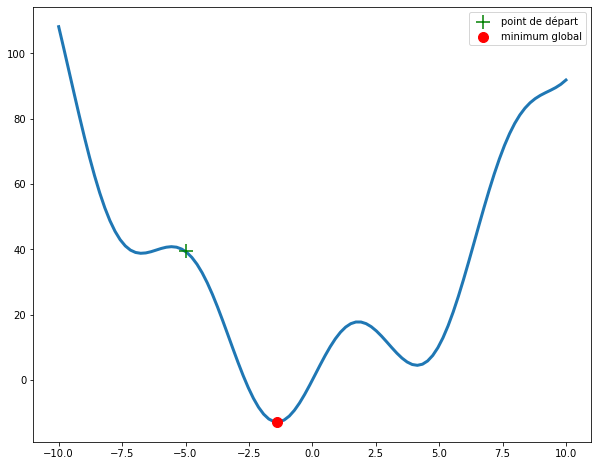

In [20]:
# Affichage
plt.figure(figsize=(10, 8))
# x en fonction de f(x)
plt.plot(x, f(x), lw=3, zorder=-1)
# x0 en fontion de f(x0)
plt.scatter(x0, f(x0), s=200, marker="+", c="g", zorder=1, label="point de départ")
# resultat en fonction de f(resultat)
plt.scatter(result, f(result), s=100, c="r", zorder=1, label="minimum global")
plt.legend()
plt.show()

## MINIMUM SUR GRAPHIQUE EN 2D

In [21]:
# Définfition d'une fonction
def f(x):
    
    return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

In [22]:
# Deux matrices de 100 éléments allant de -3 à 3
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)

# le point de depart x0 en 2D
x0 = np.zeros((2, 1))

# Passer le point x0 sur la fonction minimize() en enregistrant dans une variable result la valeur du paramètre x
result = optimize.minimize(f, x0=x0).x

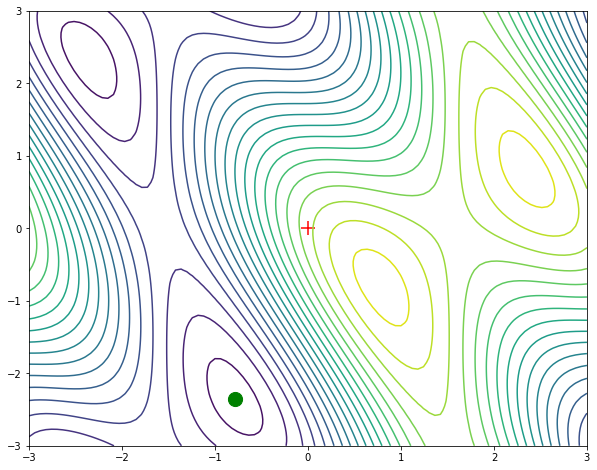

In [23]:
# Création de la figure(feuille de travail)
plt.figure(figsize=(10, 8))
plt.contour(x, y, f(np.array([x, y])), 20)

# Visualiser le point x0
plt.scatter(x0[0], x0[1], marker="+", c="r", s=200)

# Afficher le minimum globale
plt.scatter(result[0], result[1], c="g", s=200)
plt.show()

# Traitemen de signal

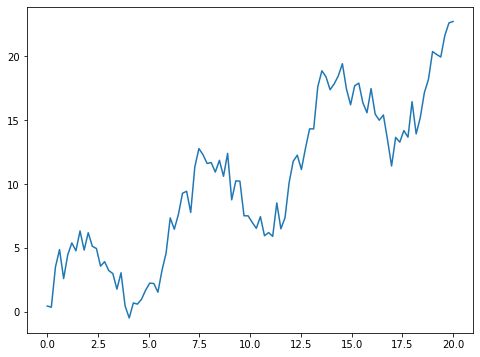

In [24]:
x = np.linspace(0, 20, 100)
y = x + 4 * np.sin(x) + np.random.randn(x.shape[0])

plt.figure(figsize=(8, 6))
# Affichage de x en fonction de y
plt.plot(x, y)
plt.show()

In [25]:
from scipy import signal

In [26]:
# Cette fonction permet d'éliminer toute tendance linéaire que l'on aura dans un signal
new_y = signal.detrend(y)

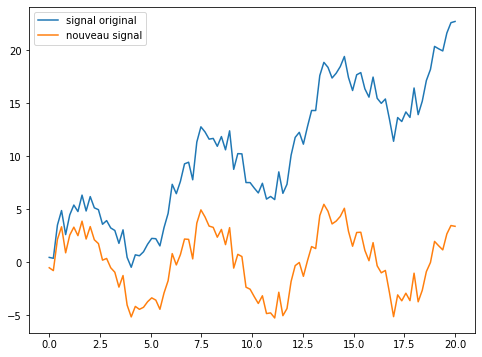

In [27]:
# Réafficher pour comparer le signal original et le nouveau
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="signal original")
plt.plot(x, new_y, label="nouveau signal")
plt.legend()
plt.show()

### La transformation de Fourier
#### C'est une technique Mathématique qui permet d'extraire et d'analyser les fréquences présentes dans un signal périodique

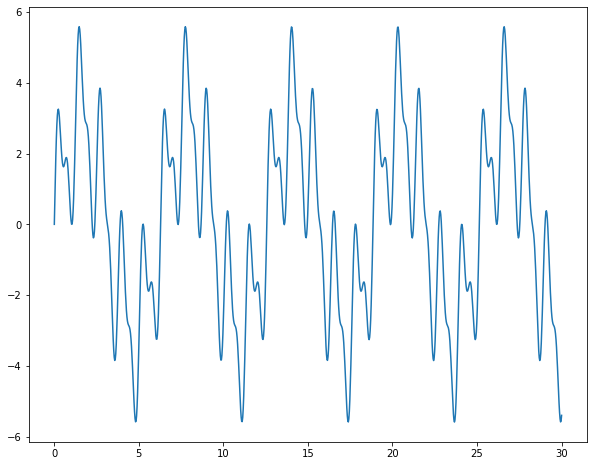

In [28]:
# Une matrice de 1000 éléments allant de 0 à 30
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x)

# Affichage
plt.figure(figsize=(10, 8))
# x en fonction de y
plt.plot(x, y)
plt.show()

In [29]:
from scipy import fftpack

C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


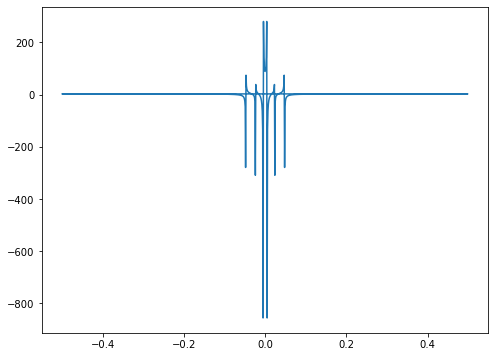

In [30]:
# Créer une instance de fftpack du signal y
fourier = fftpack.fft(y)
# Créer une instance de fftpack contenant le nombre d'élément que l'on dans y, cet nombre est une fréquence
frequences = fftpack.fftfreq(y.size)

# Affichage avant filtrage
plt.figure(figsize=(8, 6))
plt.plot(frequences, fourier)
plt.show()

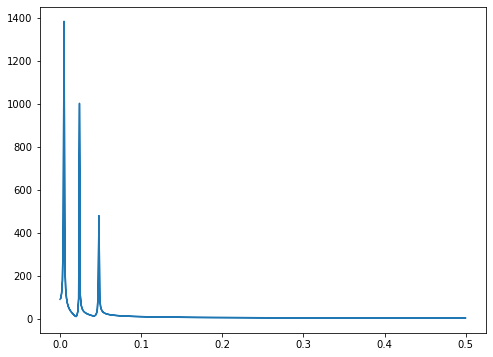

In [31]:
# Le spectre ci-dessus contient aussi des valeurs négatives, il va falloir le filtrer
# Filtrage du signal en ne prennant que des valeurs positives
power_four = np.abs(fourier)
power_freq = np.abs(frequences)

# Affichage après filtrage
plt.figure(figsize=(8, 6))
plt.plot(power_freq, power_four)
plt.show()

### Transformation de Fourier inverse pour revenir au signal original

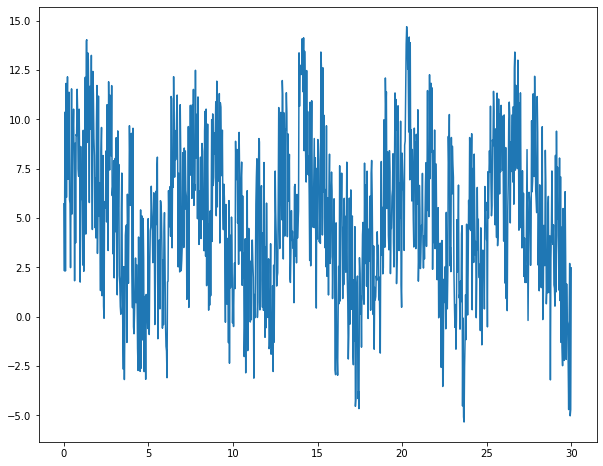

In [32]:
# Une matrice de 1000 éléments allant de 0 à 30
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0]) * 10

# Affichage
plt.figure(figsize=(10, 8))
# x en fonction de y
plt.plot(x, y)
plt.show()

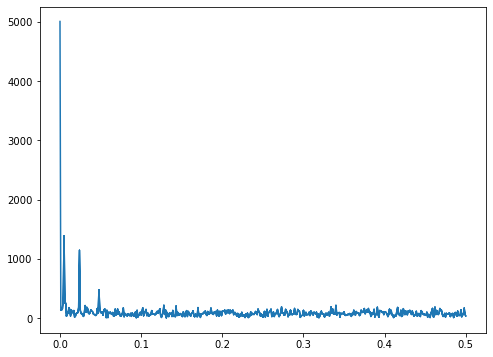

In [33]:
# Type de spectre que l'on peut avoir
fourier = fftpack.fft(y)

# Eliminer les valeurs négatives
power = np.abs(fourier)
# Créer une instance de fftpack contenant le nombre d'élément que l'on dans y, cet nombre est une fréquence
frequences = fftpack.fftfreq(y.size)

# Affichage avant filtrage
plt.figure(figsize=(8, 6))
plt.plot(np.abs(frequences), power)
plt.show()

### Filtrage du spectre

In [34]:
# Prendre toutes les valeurs inférieures à un seuil et les mettre à 0
fourier[power < 400] = 0

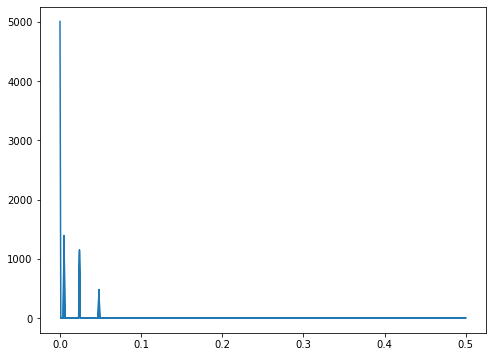

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.show()

In [36]:
# Application de la transformation de fourier inverse sur le spectre ci-dessus
signal_filtre = fftpack.ifft(fourier)

C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


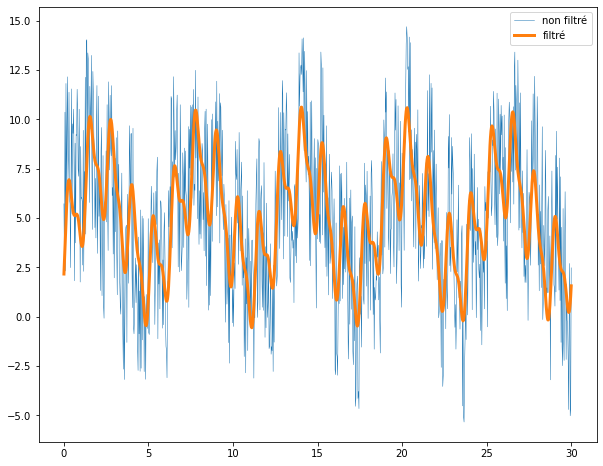

In [37]:
# Affichage après filtrage
plt.figure(figsize=(10, 8))
plt.plot(x, y, lw=0.5, label="non filtré")
plt.plot(x, signal_filtre, lw=3, label="filtré")
plt.legend()
plt.show()

# nd image - Traitement d'images

## Morphology
### Technique qui permet de transformer les matrices
### 2 Types d'opérations en morphology : 
   - **Dilatation : Imprimer des pixels**
   - **Erosion : Effacer des pixels**

In [38]:
from scipy import ndimage

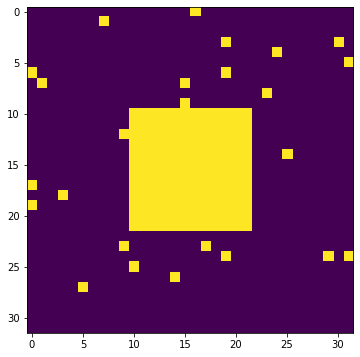

In [39]:
# Fixer les valeurs 
np.random.seed(0)
# création de l'image
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1

# Affichage de l'image
plt.figure(figsize=(8, 6))
plt.imshow(X)
plt.show()

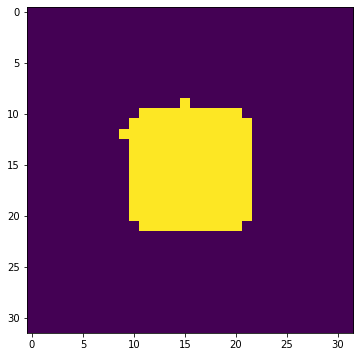

In [40]:
# Combinaison entre dilation et érosion
open_x = ndimage.binary_opening(X)

# Affichage
plt.figure(figsize=(8, 6))
plt.imshow(open_x)
plt.show()

# Cas pratique

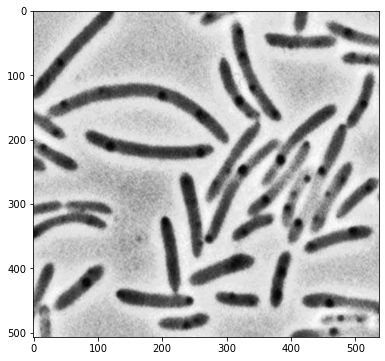

(507, 537)

In [68]:
image = plt.imread("bacteria.png")
image = image[:, :, 0]
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap="gray")
plt.show()
image.shape

### 1. Extraire les bacteries de l'arrière plan

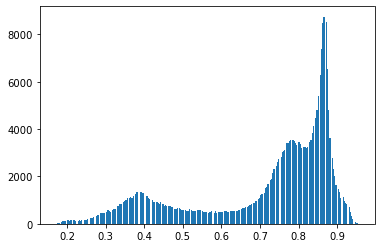

In [69]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

In [70]:
image = image < 0.6
image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

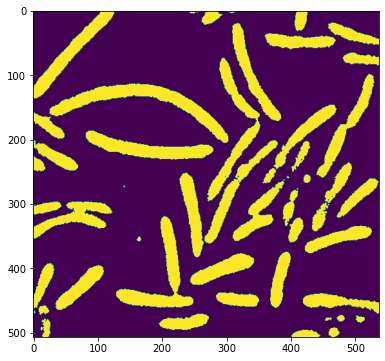

In [71]:
open_image = ndimage.binary_opening(image)

# Affichage
plt.figure(figsize=(8, 6))
plt.imshow(open_image)
plt.show()

In [72]:
# Segmenter l'image pour ensuite mettre etiqueter chaque bacterie
label_image, n_labels = ndimage.label(open_image)
print(n_labels)

53


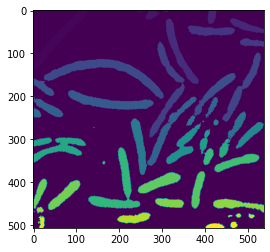

In [73]:
plt.imshow(label_image)
plt.show()

In [74]:
sizes = ndimage.sum(open_image, label_image, range(n_labels))

In [75]:
sizes

array([0.000e+00, 3.321e+03, 7.500e+01, 4.620e+02, 5.800e+01, 5.220e+02,
       1.167e+03, 2.706e+03, 1.837e+03, 7.720e+02, 3.722e+03, 2.746e+03,
       5.733e+03, 2.060e+03, 8.600e+02, 3.820e+03, 1.222e+03, 2.733e+03,
       4.810e+02, 3.170e+02, 9.790e+02, 2.510e+02, 2.317e+03, 1.180e+02,
       1.000e+01, 1.218e+03, 5.000e+00, 2.176e+03, 5.000e+00, 5.000e+00,
       6.070e+02, 5.860e+02, 2.692e+03, 6.140e+02, 5.000e+00, 4.295e+03,
       5.880e+02, 1.849e+03, 3.600e+01, 1.498e+03, 2.183e+03, 1.006e+03,
       1.825e+03, 1.147e+03, 1.826e+03, 1.690e+02, 1.200e+01, 1.276e+03,
       9.400e+01, 1.070e+02, 3.700e+01, 3.010e+02, 1.900e+02])

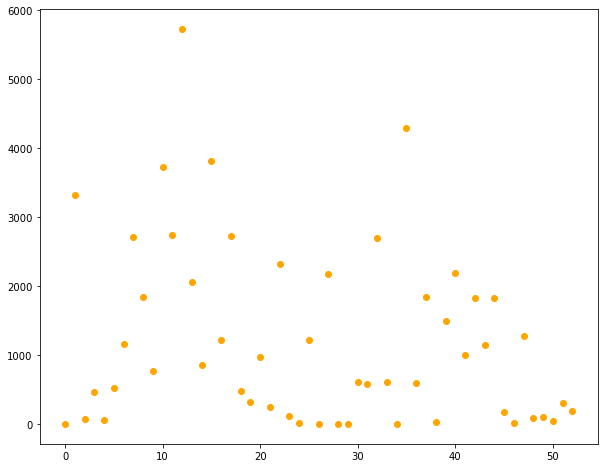

In [76]:
# Afficher toute cette taille à l'écran
plt.figure(figsize=(10, 8))
plt.scatter(range(n_labels), sizes, c="orange")
plt.show()